# Multiprocessing

In [35]:
def square(x):
    return x**2

In [36]:
data=[i for i in range(1000)]

In [37]:
%time
seq=[square(x) for x in data]
seq[:10]

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [38]:
import multiprocessing as mp
import numpy as np

In [39]:
mp.cpu_count()

4

In [40]:
%time
pool=mp.Pool(mp.cpu_count())  # todos los cores
res=pool.map(square, data)
pool.close()
res[:10]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [41]:
array=np.random.randint(0, 10, size=[200, 5000])
data=array.tolist()

In [42]:
def rango(r, mini, maxi):
    c=0
    for e in r:
        if mini<=e<=maxi:
            c+=1
    return c

In [43]:
%time res=[rango(e, 4, 8) for e in data]
res[:10]

CPU times: user 78.9 ms, sys: 2.15 ms, total: 81.1 ms
Wall time: 80.5 ms


[2528, 2562, 2505, 2506, 2542, 2517, 2534, 2559, 2442, 2474]

In [44]:
pool=mp.Pool()

%time res=pool.starmap(rango, [(e, 4, 8) for e in data])
pool.close()

res[:10]

CPU times: user 24.9 ms, sys: 1.88 ms, total: 26.8 ms
Wall time: 54.1 ms


[2528, 2562, 2505, 2506, 2542, 2517, 2534, 2559, 2442, 2474]

In [45]:
# asincrono

def rango2(i, r, mini, maxi):
    c=0
    
    for e in r:
        if mini<=e<=maxi:
            c+=1
            
    return i, c

In [46]:
res=[]

def colecta(result):
    global res
    res.append(result)

In [47]:
pool=mp.Pool(3)  # tres nucleos

%time
for i,e in enumerate(data):
    pool.apply_async(rango2, args=(i,e,4,8), callback=colecta)
    
pool.close()
pool.join()


res.sort(key=lambda x: x[0])

res[:10]

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 11 µs


[(0, 2528),
 (1, 2562),
 (2, 2505),
 (3, 2506),
 (4, 2542),
 (5, 2517),
 (6, 2534),
 (7, 2559),
 (8, 2442),
 (9, 2474)]

In [48]:
sum([x[1] for x in res])

500993

In [49]:
sum([e for e in data[0] if 4<=e<=8])

15243

In [50]:
array.shape

(200, 5000)

In [51]:
res=[]
%time
for e in data:
    for f in e:
        if 4<=f<=8:
            res.append(f)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


In [52]:
# con pandas

import pandas as pd

In [53]:
df=pd.DataFrame(np.random.randint(3, 10, size=[5, 2]))
df

0  1
0  9  5
1  3  4
2  6  8
3  3  8
4  5  6

In [54]:
def hipo(c):
    return (c[1]**2+c[2]**2)**0.5

In [55]:
with mp.Pool(3) as pool:
    res=pool.imap(hipo, df.itertuples(name=None), chunksize=10)
    out=[round(e, 2) for e in res]
out

[10.3, 5.0, 10.0, 8.54, 7.81]

In [56]:
hipo([0, 5, 8])

9.433981132056603

# Pathos

In [57]:
from pathos.multiprocessing import ProcessingPool as Pool

In [58]:
df=pd.DataFrame(np.random.randint(3, 10, size=[500, 2]))
df.head()

0  1
0  3  8
1  7  3
2  6  4
3  9  6
4  7  7

In [59]:
def fun(df):
    return df.shape

In [60]:
cores=mp.cpu_count()

df_split=np.array_split(df, cores, axis=0)

pool=Pool(cores)

%time

df_out=pd.DataFrame(np.vstack(pool.map(fun, df_split)))

pool.close()
pool.join()
pool.clear()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


In [61]:
df_out

0  1
0  125  2
1  125  2
2  125  2
3  125  2

In [62]:
df.head()

0  1
0  3  8
1  7  3
2  6  4
3  9  6
4  7  7

# Dask

In [63]:
# !pip3 install "dask[complete]"
# !pip3 install dask_ml

In [64]:
import os
import dask
import dask.dataframe as dd

In [65]:
archivos=os.path.join('data', 'accounts.*.csv')
print (archivos)
df=dd.read_csv(archivos)

df.head()

data/accounts.*.csv


id    names  amount
0   23   Ursula    1380
1   92      Tim    -178
2  239    Alice    -784
3  260  Michael    -249
4  314    Jerry    1299

In [66]:
df=dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
               parse_dates={'Date':[0,1,2]})

df.head()

Date  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  \
0 1990-01-01          1   1621.0        1540   1747.0        1701   
1 1990-01-02          2   1547.0        1540   1700.0        1701   
2 1990-01-03          3   1546.0        1540   1710.0        1701   
3 1990-01-04          4   1542.0        1540   1710.0        1701   
4 1990-01-05          5   1549.0        1540   1706.0        1701   

  UniqueCarrier  FlightNum  TailNum  ActualElapsedTime  ...  AirTime  \
0            US         33      NaN               86.0  ...      NaN   
1            US         33      NaN               73.0  ...      NaN   
2            US         33      NaN               84.0  ...      NaN   
3            US         33      NaN               88.0  ...      NaN   
4            US         33      NaN               77.0  ...      NaN   

   ArrDelay  DepDelay  Origin Dest Distance  TaxiIn  TaxiOut  Cancelled  \
0      46.0      41.0     EWR  PIT    319.0     NaN      NaN          0   
1      -1.0       7.0     EWR  PIT    319.0     NaN      NaN          0   
2       9.0       6.0     EWR  PIT    319.0     NaN      NaN          0   
3       9.0       2.0     EWR  PIT    319.0     NaN      NaN          0   
4       5.0       9.0     EWR  PIT    319.0     NaN      NaN          0   

   Diverted  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 21 columns]

In [67]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [68]:
df=dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
               parse_dates={'Date':[0,1,2]},
               dtype={'TailNum':str, 'CRSElapsedTime':float, 'Cancelled':bool})

df.tail()

Date  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  \
269176 1999-12-27          1   1645.0        1645   1830.0        1901   
269177 1999-12-28          2   1726.0        1645   1928.0        1901   
269178 1999-12-29          3   1646.0        1645   1846.0        1901   
269179 1999-12-30          4   1651.0        1645   1908.0        1901   
269180 1999-12-31          5   1642.0        1645   1851.0        1901   

       UniqueCarrier  FlightNum TailNum  ActualElapsedTime  ...  AirTime  \
269176            UA       1753  N516UA              225.0  ...    205.0   
269177            UA       1753  N504UA              242.0  ...    214.0   
269178            UA       1753  N592UA              240.0  ...    220.0   
269179            UA       1753  N575UA              257.0  ...    233.0   
269180            UA       1753  N539UA              249.0  ...    232.0   

        ArrDelay  DepDelay  Origin Dest Distance  TaxiIn  TaxiOut  Cancelled  \
269176     -31.0       0.0     LGA  DEN   1619.0     7.0     13.0      False   
269177      27.0      41.0     LGA  DEN   1619.0     5.0     23.0      False   
269178     -15.0       1.0     LGA  DEN   1619.0     5.0     15.0      False   
269179       7.0       6.0     LGA  DEN   1619.0     5.0     19.0      False   
269180     -10.0      -3.0     LGA  DEN   1619.0     6.0     11.0      False   

        Diverted  
269176         0  
269177         0  
269178         0  
269179         0  
269180         0  

[5 rows x 21 columns]

In [69]:
df.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 21 entries, Date to Diverted
dtypes: datetime64[ns](1), object(4), bool(1), float64(10), int64(5)
memory usage: 401.0 MB


In [70]:
df.shape

(Delayed('int-c4c69845-1998-47c6-9217-5a1868986272'), 21)

In [71]:
df.DepDelay.max().compute()

1435.0

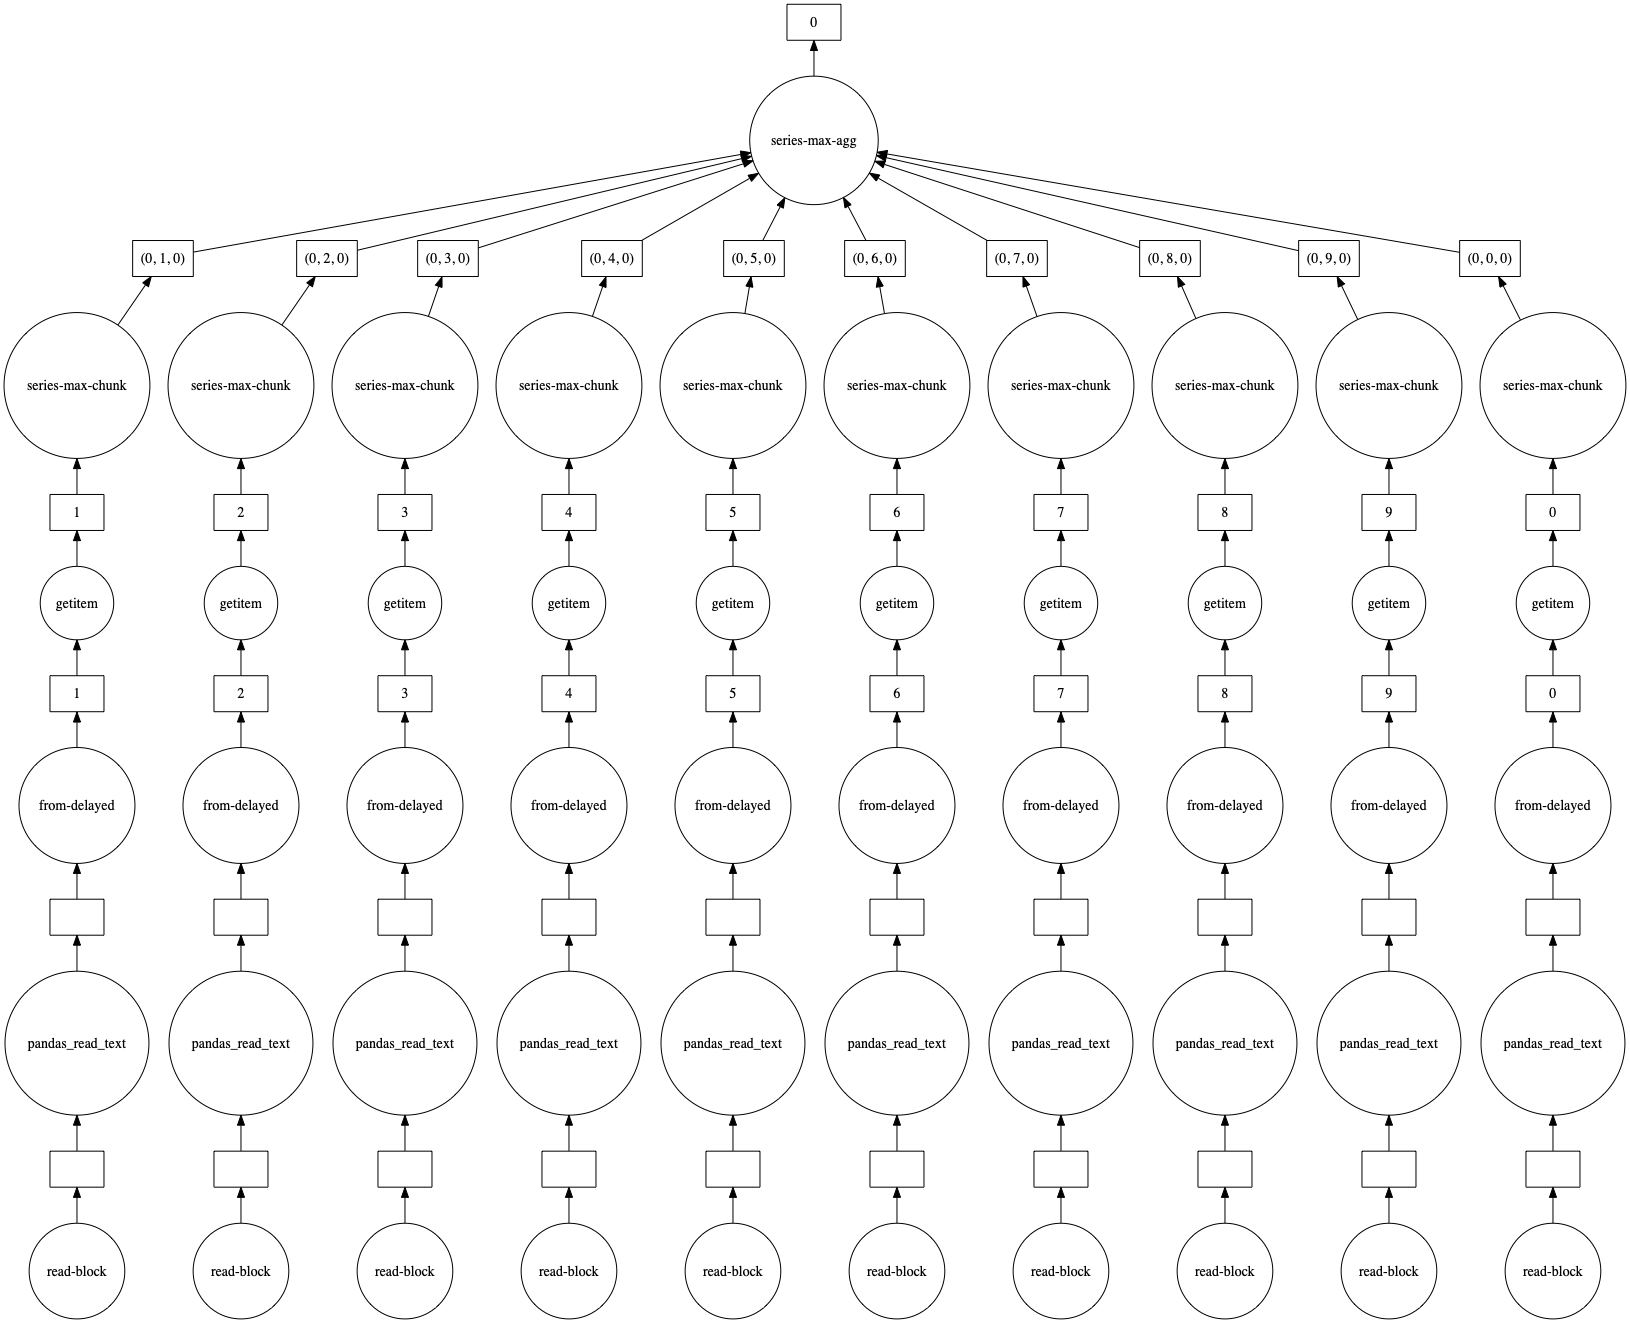

In [72]:
df.DepDelay.max().visualize()

In [73]:
len(df)

2611892

In [74]:
len(df[~df.Cancelled])  # virgulilla ==> lo contrario (como el no logico)

2540961

In [75]:
df.groupby('Origin').DepDelay.mean().compute()   # siempre el compute para calcular

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [76]:
df.groupby('Origin').DepDelay.mean()

Dask Series Structure:
npartitions=1
    float64
        ...
Name: DepDelay, dtype: float64
Dask Name: truediv, 57 tasks

In [77]:
no_cancelado=df[~df.Cancelled]

media_delay=no_cancelado.DepDelay.mean()
std_delay=no_cancelado.DepDelay.std()

In [78]:
std_delay

dd.Scalar<series-..., dtype=float64>

In [79]:
type(std_delay)

dask.dataframe.core.Scalar

In [80]:
%time media_delay.compute()

CPU times: user 6.63 s, sys: 1.3 s, total: 7.93 s
Wall time: 5 s


9.206602541321965

In [81]:
%time media_delay_res, std_delay_res = dask.compute(media_delay, std_delay)

CPU times: user 6.59 s, sys: 1.27 s, total: 7.86 s
Wall time: 4.75 s


In [82]:
std_delay_res

28.974539774551456

In [83]:
type(std_delay_res)

numpy.float64

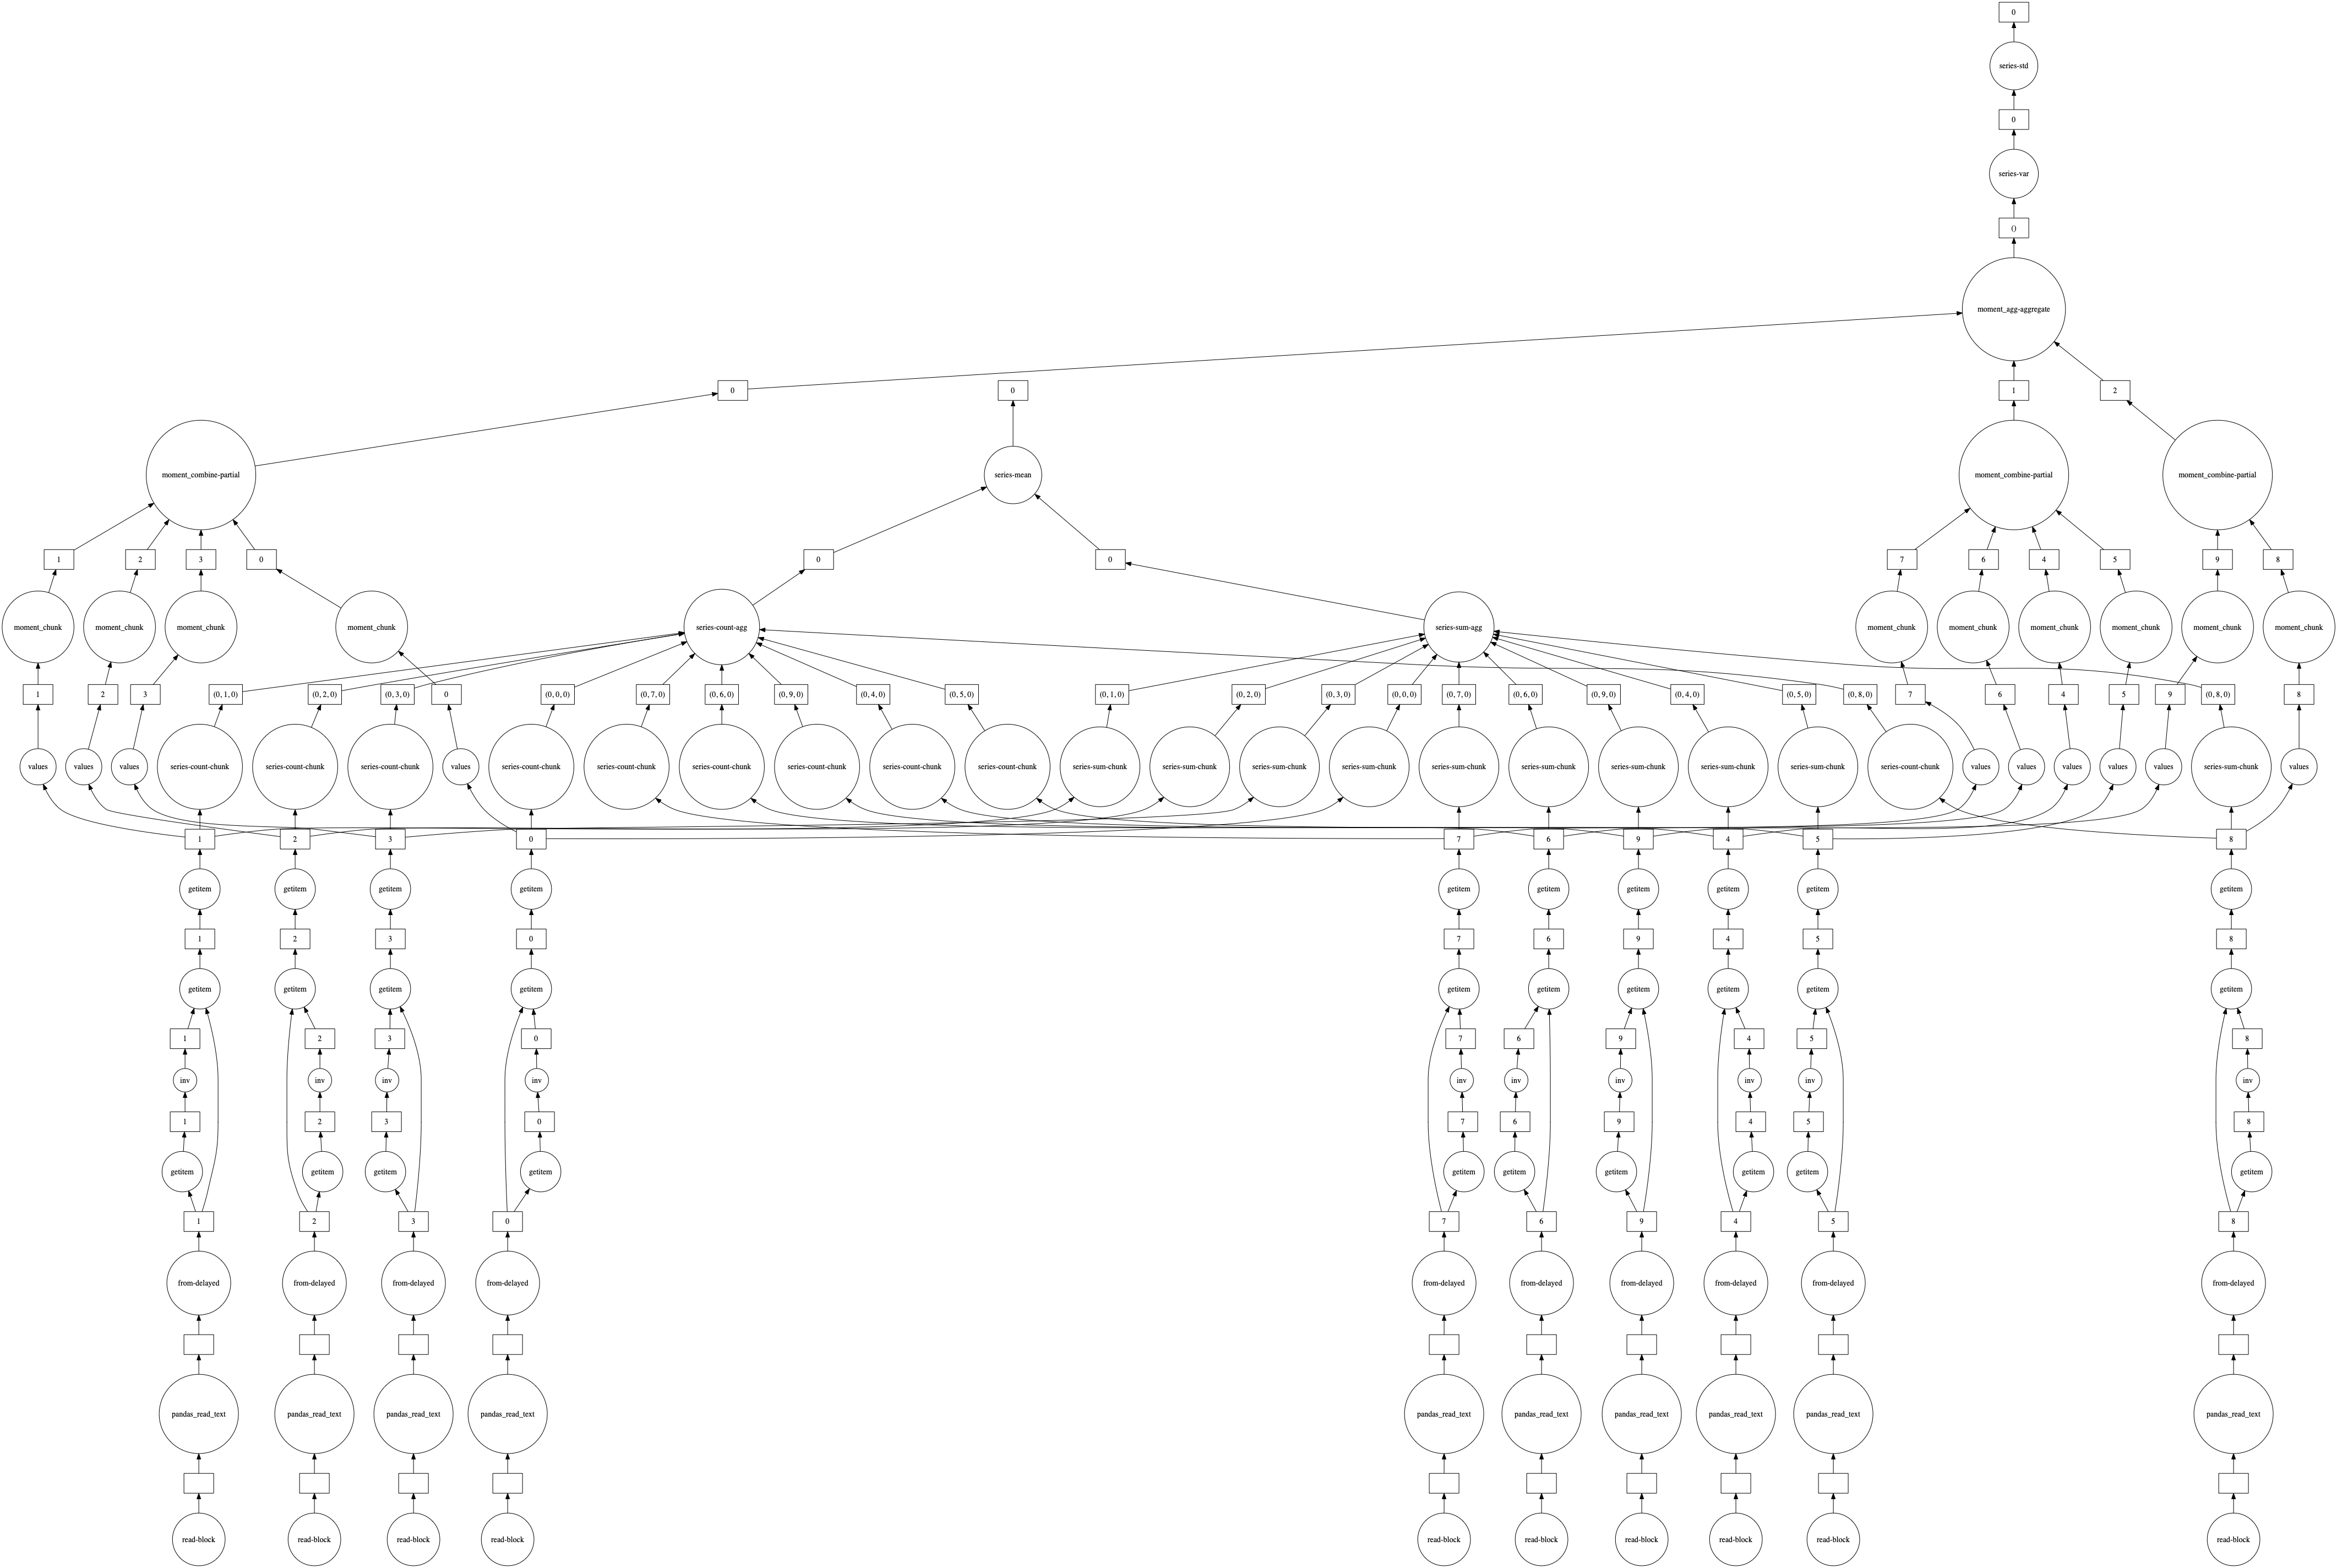

In [84]:
dask.visualize(media_delay, std_delay)

# HDFS y Parquet  (sistemas de archivos)

In [85]:
%time df_csv=dd.read_csv(archivos)
df_csv.head()

CPU times: user 17.3 ms, sys: 10.8 ms, total: 28.2 ms
Wall time: 472 ms


id    names  amount
0   23   Ursula    1380
1   92      Tim    -178
2  239    Alice    -784
3  260  Michael    -249
4  314    Jerry    1299

In [86]:
target=os.path.join('data', 'accounts.h5')
target

'data/accounts.h5'

In [87]:
%time df_csv.to_hdf(target, '/data')

CPU times: user 3.94 s, sys: 570 ms, total: 4.51 s
Wall time: 22.8 s


['data/accounts.h5', 'data/accounts.h5', 'data/accounts.h5']

In [88]:
%time df_hdf=dd.read_hdf(target, '/data')
df_hdf.head()

CPU times: user 21.9 ms, sys: 1.93 ms, total: 23.9 ms
Wall time: 40.4 ms


id    names  amount
0   23   Ursula    1380
1   92      Tim    -178
2  239    Alice    -784
3  260  Michael    -249
4  314    Jerry    1299

In [89]:
df_csv.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 68.7 MB


In [90]:
df_hdf.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 91.6 MB


In [91]:
# parquet
# !pip3 install fastparquet

In [92]:
target=os.path.join('data', 'accounts.parquet')

df_csv.categorize(columns=['names']).to_parquet(target, 
                                                storage_options={'has_nulls':True},
                                                engine='fastparquet')

In [93]:
%time df_p=dd.read_parquet(target)
df_p.head()

CPU times: user 9.99 ms, sys: 1.83 ms, total: 11.8 ms
Wall time: 418 ms


id    names  amount
index                      
0       23   Ursula    1380
1       92      Tim    -178
2      239    Alice    -784
3      260  Michael    -249
4      314    Jerry    1299

In [94]:
df_p.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: category(1), int64(2)
memory usage: 71.5 MB


In [95]:
%time df_csv.amount.sum().compute()

CPU times: user 715 ms, sys: 191 ms, total: 907 ms
Wall time: 464 ms


3101435607

In [96]:
%time df_hdf.amount.sum().compute()

CPU times: user 2.38 s, sys: 187 ms, total: 2.57 s
Wall time: 2.6 s


3101435607

In [97]:
%time df_p.amount.sum().compute()

CPU times: user 150 ms, sys: 73.3 ms, total: 224 ms
Wall time: 153 ms


3101435607

# tqdm

In [98]:
# !pip3 install tqdm

In [99]:
import time
from tqdm import tqdm

In [100]:
for i in tqdm(range(2), desc='Primer loop'):
    tqdm._instances.clear()
    for j in tqdm(range(5), desc='Segundo loop'):
        time.sleep(.5)

Primer loop: 100%|██████████| 2/2 [00:05<00:00,  2.52s/it]


In [101]:
import pandas as pd
import numpy as np
from tqdm import tqdm
#from tqdm.auto import tqdm  # for notebooks

df=pd.DataFrame(np.random.randint(0, int(1e8), (10000, 1000)))

# Create and register a new `tqdm` instance with `pandas`
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
df.groupby(0).progress_apply(lambda x: x**2)

/Users/data/Library/Python/3.7/lib/python/site-packages/tqdm/_tqdm.py:634: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 9998/9998 [46:10<00:00,  3.61it/s]


0                 1                 2                 3    \
0     3699479053695649   875359502925625  1210165981753600  5788454138135881   
1     7674202386375625   549529380013849  8030684588843569  3169416050119489   
2     3097256742918009   252712319837184       52130479041    23138158725796   
3     5849601410739969  3097394318669121  1129164297241600   106844575999225   
4     5227603352895889  3711720494579881  8386290700816249   252035913658321   
...                ...               ...               ...               ...   
9995  3708723766101264   393396640024441  5301971652700321  6860532250588900   
9996  6440095402542025  1618961849505625    35253217503364  3047669643724209   
9997   773803570155625  3109843967700625  7217378021253409  2941540333368961   
9998  9445677423765625  6234060516108489   920517602441089  5168697916833649   
9999  2068078126920129     2654299156804   153692824138681  2756375686432809   

                   4                 5                 6                 7    \
0     6723090322769209    67215992543296  9004502291907136  2093066526001936   
1     9809728000253041   321536217707761  6575817911067889  1481686028655625   
2      960621899197801  3629038201767001   737013958296001  1827327382562500   
3     5984655469908025  2313052746958849   383920642895449  4577383725013225   
4     3751753112421136    16702833348100   666471277371025  1573158725194225   
...                ...               ...               ...               ...   
9995  3029160309444864  5424321763500025    26220738943161   338922245645281   
9996  4756606955849281  5156659009234161  2729026794247744  1489096102860864   
9997   109382690469924   730561813614649   956965563219600  1421465084191684   
9998  3302202549462436  8075810786215225   203126430531049  9575500038906256   
9999  5262725953443904  1640636311743361  3800136107819536  3221141830050816   

                   8                 9    ...               990  \
0     5898395597826169  3358269374632929  ...  9776015868345169   
1     8972056474483600  1352486753421241  ...  7668544131410176   
2     7171354112087104    35959079634921  ...  1597239191975625   
3     2188133944920036  7218004324227921  ...  7888529476951236   
4     1795318250470416  8475291611454409  ...   608393451290689   
...                ...               ...  ...               ...   
9995   996468039201924  1164134206986921  ...  6007228244828721   
9996   192801195072369  3177821099531556  ...   527626550635129   
9997   423157072091524    13174729349401  ...  4047405153408400   
9998  4813413587955361  9593530182978624  ...  2579120084661444   
9999  1073892234387025  7444748150966116  ...  7303909840297225   

                   991               992               993               994  \
0     2443746654958756   174124070489664  1767730225939456  7822832892368400   
1     3601661111573281  2294650847520196  4194640584942025  6264527001025225   
2     6615764179673104     8411583474529  1130524621725625  2451584305602576   
3     2726611120509444  8340514076752225   790737155762401  3667057355150289   
4     8133731404588804  1587148709731225   519576602173729  4907601445775625   
...                ...               ...               ...               ...   
9995  7172880534979600  7951790935024225  1415821607034025  2096004159851044   
9996  6544127707183089   793246552024689   801023015522500  2439098585847361   
9997   205897273472641   364352698400625   264088045617796  4513495293232704   
9998   279289740737296  9766627293757504  7113530624379001  2102802817643584   
9999   123754989728484  3201937143978244   272320624579600  9485858097436900   

                   995               996               997               998  \
0       87745054076289  2070836536538025    36791855165641   548406751903396   
1     5057499821442201      678076490116  7900660731406921  1420913251170009   
2       58540892044804  3231335720935921  5322924482640625  2037271314644164   
3     64323

In [103]:
from dask import delayed, compute
from tqdm import trange
from time import sleep
from dask.diagnostics import ProgressBar


res=[]

def fun(x):
    sleep(x)
    return x

for i in trange(10):
    res.append(delayed(fun)(i))
    

with ProgressBar():
    compute(res)

100%|██████████| 10/10 [00:00<00:00, 10472.67it/s]

[                                        ] | 0% Completed |  0.1s

[########################################] | 100% Completed | 16.0s
